In [22]:
# tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skew
from scipy import stats
from scipy.stats import kurtosistest
import statsmodels.api as sm

In [23]:
df = pd.read_csv("data/03-primas_bajas.csv", index_col = 0).reset_index()
df.head(2)

,index,age,sex,bmi,children,smoker,region,charges
0,0,19.0,female,27.90,0.0,yes,southwest,16884.9240
1,1,18.0,male,33.77,1.0,no,southeast,1725.5523


## Ana Campos y Ana González



# Pair Programming Test Estadísticos

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

- ¿Qué **diferencia** existe el error de tipo I y el error de tipo II?

>- El error de tipo 1 se comete si rechazamos la hipótesis nula cuando es verdadera.

>- El error de tipo 2 es cuando la hipótesis nula es falsa y no la rachazamos.

- ¿Qué es la **asimetría**?


Es cuando la distribución de los datos de una variable carece de simetría con respecto a la media.

La distribución puede estar sesgada a la derecha (si tiene la mayor parte de los datos a la izquierda), o a la izquierda (si tiene la mayor parte de los datos a la derecha).

- ¿Es vuestra variable respuesta **asimétrica**?


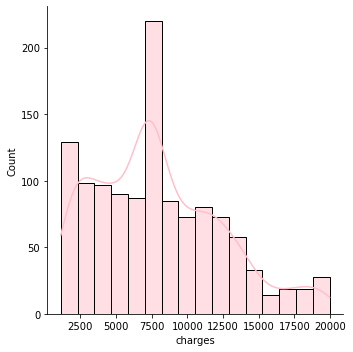

In [24]:
#  forma visual
sns.displot(df['charges'], kde = True, color = "pink")
plt.show();

In [25]:
#  forma numérica
df['charges'].skew()

0.604116883646148

Nuestra distribución es **asimetrica** **positiva**( ya que el valor es positivo) y por tanto los datos, son asimetricos positivos,por lo tanto,  **no** son normales.

- ¿Qué tipo de **curtosis** presenta vuestra variable respuesta?

In [33]:
kurtosistest(df["charges"])

KurtosistestResult(statistic=-1.2406427166555665, pvalue=0.21473776432845348)

¿Cuál es la H0 en este test?

- H0: nuestros datos son normales

- H1: nuestros datos son no normales. 

> Por lo tanto, si el p-valor > 0.05 no podemos rechazar la hipótesis nula, y por lo tanto nuestros valores son normales con un intervalo de confianza del 95%. 

Tenemos una distribución platcúrtica, nuestro valor de curtosis es negativo, con p>0.05, según este test nuestros datos son normales con una curtosis platicúrica.


- ¿Es vuestra variable respuesta **normal**? Demostrarlo visual y analíticamente.

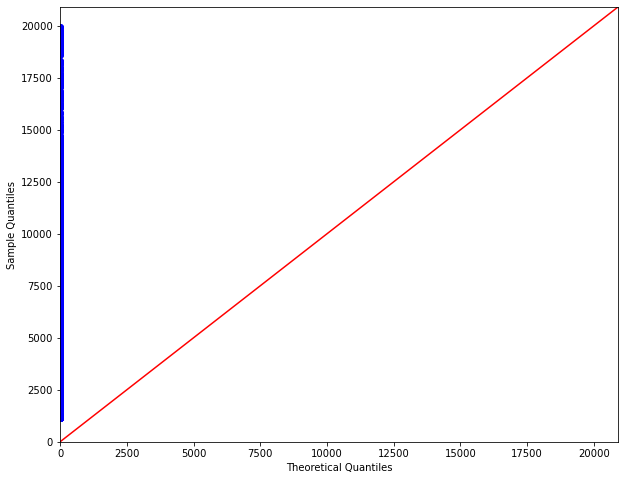

In [39]:
sm.qqplot(df['charges'], line='45');

In [40]:
stats.shapiro(df["charges"])

ShapiroResult(statistic=0.95556640625, pvalue=1.2091397390006669e-18)

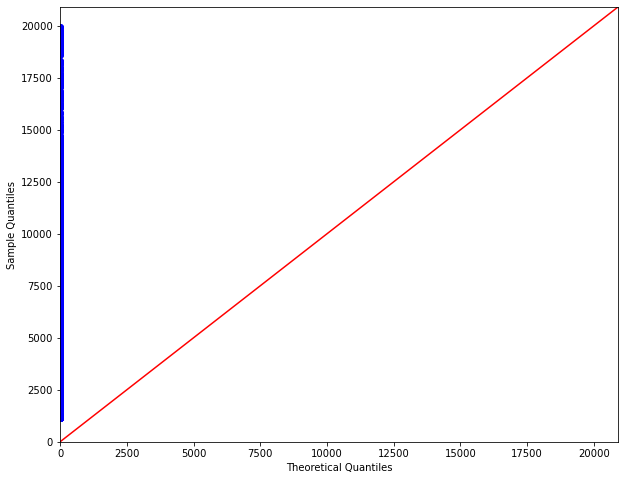

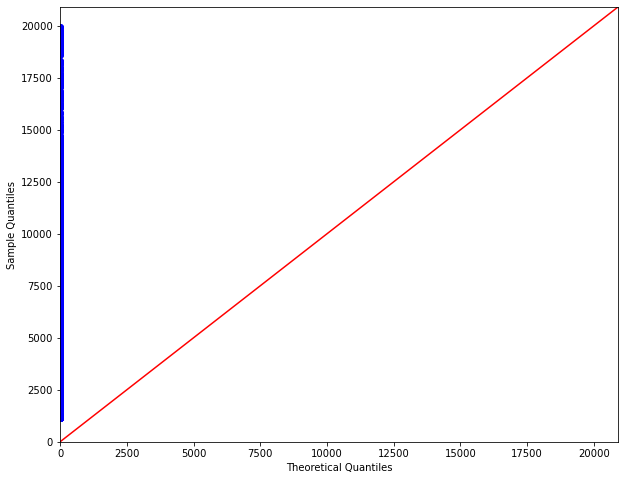

In [36]:
sm.qqplot(df['charges'], line='45')

In [41]:
from scipy.stats import kstest
kstest(df["charges"], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)